<a href="https://colab.research.google.com/github/Rishit605/earthquake-prediction/blob/mastertwo/EarthQuake_UniVariate_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/viktorsapozhok/earthquake-prediction/master/data/train.csv

--2023-10-30 15:28:55--  https://raw.githubusercontent.com/viktorsapozhok/earthquake-prediction/master/data/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8453879 (8.1M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]   8.06M  --.-KB/s    in 0.1s    

2023-10-30 15:28:56 (72.6 MB/s) - ‘train.csv’ saved [8453879/8453879]



In [ ]:
import pandas as pd

df = pd.read_csv('train.csv')
df

,Unnamed: 0,target,fftr_mean_first_10000,fftr_av_change_rate_roll_std_10,ffti_count_big_50000_threshold_100,fftr_exp_Moving_std_30000_mean,ffti_abs_percentile_60,fftr_percentile_roll_std_90_window_10,ffti_mfcc_0_avg,ffti_max_roll_std_1000,...,ffti_std_last_50000,ffti_percentile_roll_std_5_window_100,percentile_roll_mean_50_window_10,Hann_window_mean_15000,std_roll_std_10,time_rev_asym_stat_10,ffti_percentile_roll_mean_5_window_500,fftr_percentile_70,fftr_abs_percentile_60,percentile_roll_std_40_window_10000
0,0,1.4308,79.05887,74994.5,45603,2428.13719,615.92737,1633.88914,856.21535,6310.69117,...,1680.01648,414.55015,4.9,4.80908,2.80907,5.33570,-64.58153,378.70057,623.10325,4.10688
1,1,1.3915,85.77344,74994.5,45633,2547.17549,642.14930,2421.12936,855.23909,8922.60101,...,2190.50460,417.85340,4.7,4.65315,4.12078,-6.87905,-51.25212,379.26444,644.34084,4.78221
2,2,1.3532,96.01704,74994.5,45830,2647.87883,647.45942,2623.32510,861.57445,9233.03172,...,2327.87983,414.55490,4.9,4.83220,4.22796,-6.52812,-61.02525,383.02840,644.03596,5.33430
3,3,1.3138,57.06541,74994.5,45818,2644.82923,642.10546,2576.74866,856.16621,9270.91003,...,2291.61030,412.39390,4.9,4.82767,4.28418,-0.60859,-63.95931,388.53684,643.42017,4.24817
4,4,1.2744,89.96693,74994.5,45592,2681.31216,642.67129,2775.94872,856.93674,7714.21327,...,2420.35521,410.41320,4.9,4.83630,4.18325,6.89355,-69.83705,386.52672,641.43309,4.25816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,4189,9.9268,55.86748,74994.5,45281,2139.55269,598.22183,1309.28354,849.36734,4081.99374,...,1201.17477,418.09600,4.5,4.37696,1.91101,-1.63032,-59.74334,359.83401,597.46226,3.09911
4190,4190,9.8875,79.40215,74994.5,45419,2147.22468,603.79668,1461.80835,848.04134,4115.31710,...,1263.90533,418.58744,4.4,4.35137,2.09222,0.62264,-61.10067,368.37303,603.68185,2.88562
4191,4191,9.8492,47.81284,74994.5,45311,2142.60748,589.50127,1242.86529,846.51100,2788.72206,...,1023.92260,412.73443,4.6,4.54046,1.29651,2.17682,-63.56066,356.15024,587.67602,2.92007
4192,4192,9.8098,97.70581,74994.5,45381,2189.65942,599.88798,1318.29924,848.50946,5564.18190,...,1352.15235,408.66375,4.5,4.39638,2.41549,-3.06851,-98.78952,364.40530,601.26181,3.06957


---

# **UniVariate TimeSeries**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Official Website of National Center of Seismology.xlsx to Official Website of National Center of Seismology.xlsx


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression, Lasso, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error

In [3]:
df = pd.read_excel('/content/Official Website of National Center of Seismology.xlsx', header=1)
df

,Origin Time,Lat,Long,Depth,Magnitude,Location
0,2022-09-09 08:38:34 IST,33.74,82.47,10.0,4.5,"346km ENE of Hanley, Jammu & Kashmir, India"
1,2022-09-09 13:03:53 IST,35.77,71.50,210.0,4.5,"170km SSE of Fayzabad, Afghanistan"
2,2022-09-09 15:40:32 IST,32.59,75.65,5.0,2.8,"75km WNW of Dharamshala, Himachal Pradesh, India"
3,2022-09-10 20:14:02 IST,29.81,80.40,11.0,2.6,"30km NE of Pithoragarh, Uttarakhand, India"
4,2022-09-11 01:05:13 IST,36.35,71.82,140.0,3.9,"140km SE of Fayzabad, Afghanistan"
...,...,...,...,...,...,...
1479,2023-09-08 18:53:36 IST,36.62,71.42,10.0,3.8,"94km SE of Fayzabad, Afghanistan"
1480,2023-09-09 01:03:38 IST,30.41,94.86,10.0,4.3,"255km N of Pangin, Arunachal Pradesh, India"
1481,2023-09-09 04:20:15 IST,26.11,90.97,24.0,3.2,"76km W of Guwahati, Assam, India"
1482,2023-09-09 08:53:21 IST,29.80,96.03,10.0,3.5,"198km NNE of Pangin, Arunachal Pradesh, India"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Origin Time  1484 non-null   object 
 1   Lat          1484 non-null   float64
 2   Long         1484 non-null   float64
 3   Depth        1484 non-null   float64
 4   Magnitude    1484 non-null   float64
 5   Location     1484 non-null   object 
dtypes: float64(4), object(2)
memory usage: 69.7+ KB


In [5]:
df['Timestamp'] = pd.to_datetime(df['Origin Time'])
df

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,Origin Time,Lat,Long,Depth,Magnitude,Location,Timestamp
0,2022-09-09 08:38:34 IST,33.74,82.47,10.0,4.5,"346km ENE of Hanley, Jammu & Kashmir, India",2022-09-09 08:38:34
1,2022-09-09 13:03:53 IST,35.77,71.50,210.0,4.5,"170km SSE of Fayzabad, Afghanistan",2022-09-09 13:03:53
2,2022-09-09 15:40:32 IST,32.59,75.65,5.0,2.8,"75km WNW of Dharamshala, Himachal Pradesh, India",2022-09-09 15:40:32
3,2022-09-10 20:14:02 IST,29.81,80.40,11.0,2.6,"30km NE of Pithoragarh, Uttarakhand, India",2022-09-10 20:14:02
4,2022-09-11 01:05:13 IST,36.35,71.82,140.0,3.9,"140km SE of Fayzabad, Afghanistan",2022-09-11 01:05:13
...,...,...,...,...,...,...,...
1479,2023-09-08 18:53:36 IST,36.62,71.42,10.0,3.8,"94km SE of Fayzabad, Afghanistan",2023-09-08 18:53:36
1480,2023-09-09 01:03:38 IST,30.41,94.86,10.0,4.3,"255km N of Pangin, Arunachal Pradesh, India",2023-09-09 01:03:38
1481,2023-09-09 04:20:15 IST,26.11,90.97,24.0,3.2,"76km W of Guwahati, Assam, India",2023-09-09 04:20:15
1482,2023-09-09 08:53:21 IST,29.80,96.03,10.0,3.5,"198km NNE of Pangin, Arunachal Pradesh, India",2023-09-09 08:53:21


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Origin Time  1484 non-null   object        
 1   Lat          1484 non-null   float64       
 2   Long         1484 non-null   float64       
 3   Depth        1484 non-null   float64       
 4   Magnitude    1484 non-null   float64       
 5   Location     1484 non-null   object        
 6   Timestamp    1484 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 81.3+ KB


In [7]:
df.isna().sum()

Origin Time    0
Lat            0
Long           0
Depth          0
Magnitude      0
Location       0
Timestamp      0
dtype: int64

### **Data Manipulation**

In [8]:
df.drop(columns = ['Origin Time', 'Location'], inplace=True)
df

,Lat,Long,Depth,Magnitude,Timestamp
0,33.74,82.47,10.0,4.5,2022-09-09 08:38:34
1,35.77,71.50,210.0,4.5,2022-09-09 13:03:53
2,32.59,75.65,5.0,2.8,2022-09-09 15:40:32
3,29.81,80.40,11.0,2.6,2022-09-10 20:14:02
4,36.35,71.82,140.0,3.9,2022-09-11 01:05:13
...,...,...,...,...,...
1479,36.62,71.42,10.0,3.8,2023-09-08 18:53:36
1480,30.41,94.86,10.0,4.3,2023-09-09 01:03:38
1481,26.11,90.97,24.0,3.2,2023-09-09 04:20:15
1482,29.80,96.03,10.0,3.5,2023-09-09 08:53:21


### **Seasonal Features**

Encode seasonal information into features, such as sine and cosine functions of time, to capture seasonal variations in earthquake activity.

In [9]:
# Create sine and cosine features of time
df['sin_time'] = np.sin(2 * np.pi * df.index / 365)
df['cos_time'] = np.cos(2 * np.pi * df.index / 365)

### **Feature Aggregation**

Aggregate earthquake occurrences over different time windows (e.g., daily, weekly, monthly) to capture patterns in earthquake frequency.

In [10]:
YEAR = []
MONTH = []
DAY = []
WEEKDAY = []
for i in range(len(df)):
    WEEKDAY.append(df.Timestamp[i].weekday())
    DAY.append(df.Timestamp[i].day)
    MONTH.append(df.Timestamp[i].month)
    YEAR.append(df.Timestamp[i].year)

In [11]:
df['Year'] = YEAR
df['Month'] = MONTH
df['Day'] = DAY
df['Weekday'] = WEEKDAY

In [12]:
df

,Lat,Long,Depth,Magnitude,Timestamp,sin_time,cos_time,Year,Month,Day,Weekday
0,33.74,82.47,10.0,4.5,2022-09-09 08:38:34,0.000000,1.000000,2022,9,9,4
1,35.77,71.50,210.0,4.5,2022-09-09 13:03:53,0.017213,0.999852,2022,9,9,4
2,32.59,75.65,5.0,2.8,2022-09-09 15:40:32,0.034422,0.999407,2022,9,9,4
3,29.81,80.40,11.0,2.6,2022-09-10 20:14:02,0.051620,0.998667,2022,9,10,5
4,36.35,71.82,140.0,3.9,2022-09-11 01:05:13,0.068802,0.997630,2022,9,11,6
...,...,...,...,...,...,...,...,...,...,...,...
1479,36.62,71.42,10.0,3.8,2023-09-08 18:53:36,0.321270,0.946988,2023,9,8,4
1480,30.41,94.86,10.0,4.3,2023-09-09 01:03:38,0.337523,0.941317,2023,9,9,5
1481,26.11,90.97,24.0,3.2,2023-09-09 04:20:15,0.353676,0.935368,2023,9,9,5
1482,29.80,96.03,10.0,3.5,2023-09-09 08:53:21,0.369725,0.929141,2023,9,9,5


In [13]:
change_year_index = []
change_year = []
year_list = df['Year'].tolist()
for y in range(0,len(year_list)-1):
    if year_list[y]!=year_list[y+1]:
        change_year.append(year_list[y+1])
        change_year_index.append(y+1)

In [14]:
change_year

[2023]

In [15]:
df.set_index('Timestamp', inplace = True)

In [16]:
df

,Lat,Long,Depth,Magnitude,sin_time,cos_time,Year,Month,Day,Weekday
Timestamp,,,,,,,,,,
2022-09-09 08:38:34,33.74,82.47,10.0,4.5,0.000000,1.000000,2022,9,9,4
2022-09-09 13:03:53,35.77,71.50,210.0,4.5,0.017213,0.999852,2022,9,9,4
2022-09-09 15:40:32,32.59,75.65,5.0,2.8,0.034422,0.999407,2022,9,9,4
2022-09-10 20:14:02,29.81,80.40,11.0,2.6,0.051620,0.998667,2022,9,10,5
2022-09-11 01:05:13,36.35,71.82,140.0,3.9,0.068802,0.997630,2022,9,11,6
...,...,...,...,...,...,...,...,...,...,...
2023-09-08 18:53:36,36.62,71.42,10.0,3.8,0.321270,0.946988,2023,9,8,4
2023-09-09 01:03:38,30.41,94.86,10.0,4.3,0.337523,0.941317,2023,9,9,5
2023-09-09 04:20:15,26.11,90.97,24.0,3.2,0.353676,0.935368,2023,9,9,5


### **Lagging**

Create lagged versions of the target variable (magnitude) to capture temporal relationships. For instance, you can create features representing the magnitude of earthquakes that occurred 1 day, 2 days, 3 days, etc., in the past.

In [18]:
# Create lagged versions of the target variable (magnitude)
for lag in range(1, 4):
    df['mag_lag_' + str(lag)] = df['Magnitude'].shift(lag)

# Remove rows with missing values in lagged features
df.dropna(subset=['mag_lag_1', 'mag_lag_2', 'mag_lag_3'], inplace=True)


In [19]:
df

,Lat,Long,Depth,Magnitude,sin_time,cos_time,Year,Month,Day,Weekday,mag_lag_1,mag_lag_2,mag_lag_3
Timestamp,,,,,,,,,,,,,
2022-09-10 20:14:02,29.81,80.40,11.0,2.6,0.051620,0.998667,2022,9,10,5,2.8,4.5,4.5
2022-09-11 01:05:13,36.35,71.82,140.0,3.9,0.068802,0.997630,2022,9,11,6,2.6,2.8,4.5
2022-09-11 01:14:21,33.62,71.54,71.0,3.8,0.085965,0.996298,2022,9,11,6,3.9,2.6,2.8
2022-09-11 18:20:20,0.68,98.45,10.0,4.5,0.103102,0.994671,2022,9,11,6,3.8,3.9,2.6
2022-09-11 23:06:21,32.87,75.51,10.0,2.5,0.120208,0.992749,2022,9,11,6,4.5,3.8,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-08 18:53:36,36.62,71.42,10.0,3.8,0.321270,0.946988,2023,9,8,4,2.9,4.2,4.4
2023-09-09 01:03:38,30.41,94.86,10.0,4.3,0.337523,0.941317,2023,9,9,5,3.8,2.9,4.2
2023-09-09 04:20:15,26.11,90.97,24.0,3.2,0.353676,0.935368,2023,9,9,5,4.3,3.8,2.9


In [21]:
df.index

DatetimeIndex(['2022-09-10 20:14:02', '2022-09-11 01:05:13',
               '2022-09-11 01:14:21', '2022-09-11 18:20:20',
               '2022-09-11 23:06:21', '2022-09-12 04:05:16',
               '2022-09-12 04:40:19', '2022-09-12 10:18:37',
               '2022-09-12 21:22:15', '2022-09-13 21:31:27',
               ...
               '2023-09-07 15:10:32', '2023-09-07 16:02:53',
               '2023-09-07 23:34:11', '2023-09-08 00:21:26',
               '2023-09-08 01:47:13', '2023-09-08 18:53:36',
               '2023-09-09 01:03:38', '2023-09-09 04:20:15',
               '2023-09-09 08:53:21', '2023-09-09 11:41:31'],
              dtype='datetime64[ns]', name='Timestamp', length=1481, freq=None)

# **TO ADD:**

## **External Data:**
> Integrate external data sources, such as weather data, solar activity data, or atmospheric pressure measurements, to capture potential environmental factors that might influence earthquake behavior.

## **Geographic Features:**

> Create features based on the geographic location of earthquakes, such as distance to tectonic plate boundaries, distance to faults, or proximity to populated areas.

## **Geological Features:**

> Consider incorporating geological features such as rock type, soil type, or fault characteristics to capture the influence of geological factors on earthquake occurrence.


## **Visualization**

In [ ]:
sns.set_theme(style="ticks")

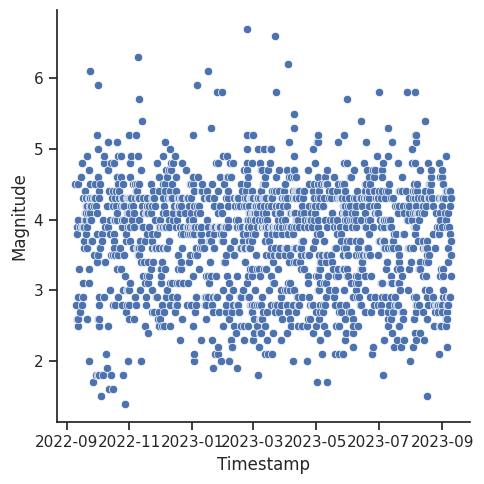

In [ ]:
sns.relplot(data = df, x='Timestamp', y='Magnitude')

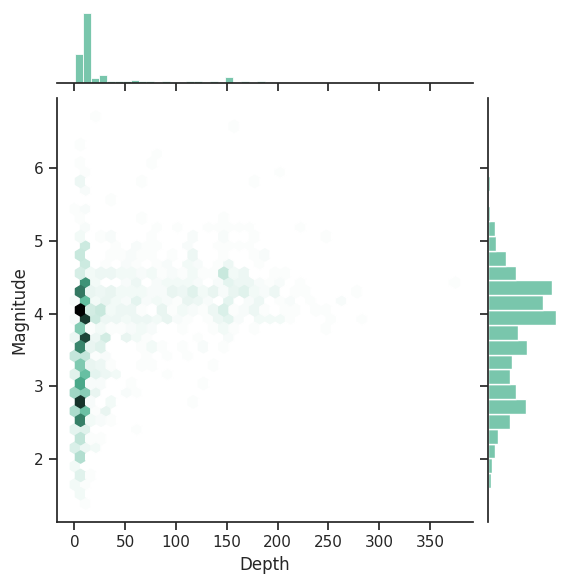

In [ ]:
sns.jointplot(data = df, x='Depth', y='Magnitude', kind="hex", color="#4CB391")

<Axes: xlabel='Magnitude', ylabel='Depth'>

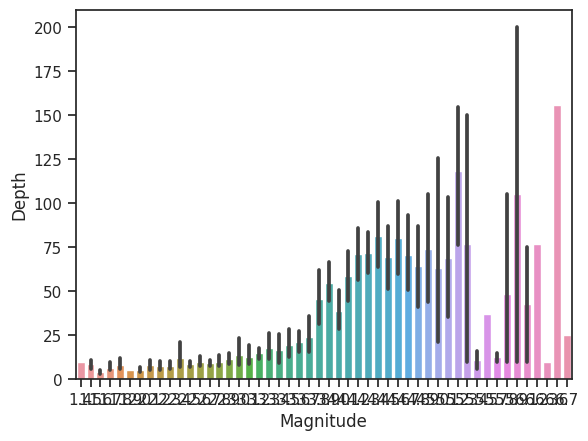

In [ ]:
sns.barplot(data=df, x='Magnitude', y='Depth')

<Axes: xlabel='Timestamp'>

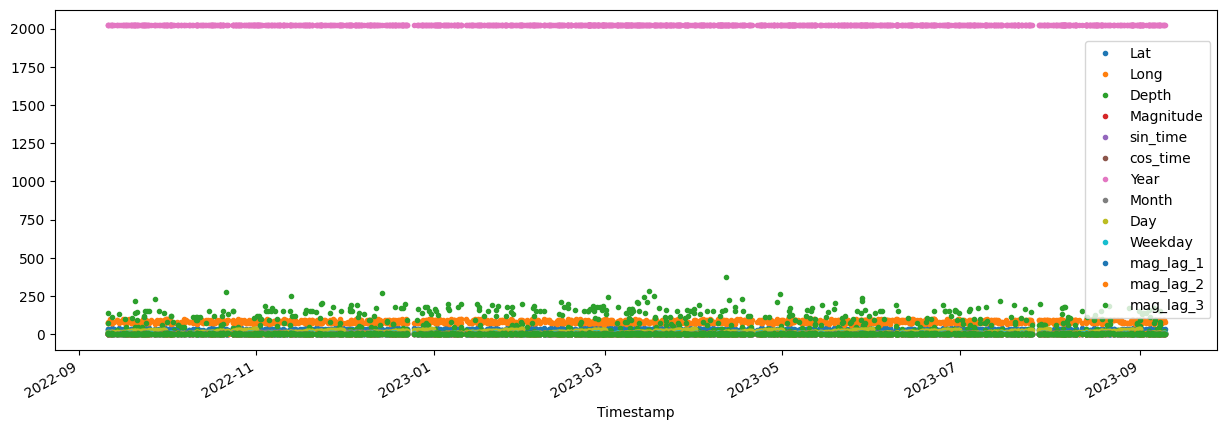

In [20]:
sns.color_palette("mako", as_cmap=True)
df.plot(style='.', figsize=(15, 5))

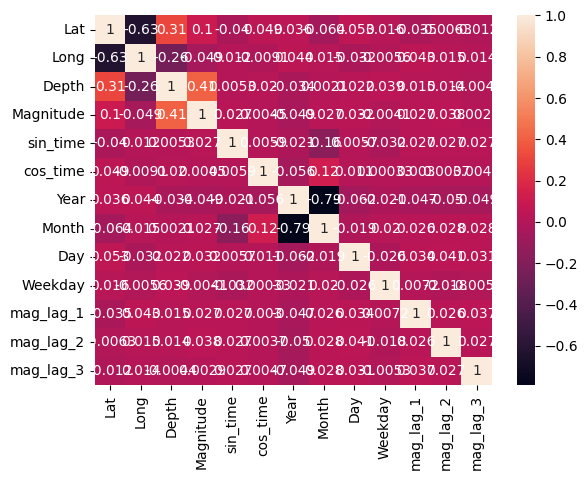

In [21]:
corr = df.corr()

sns.heatmap(corr, annot=True)
plt.show()

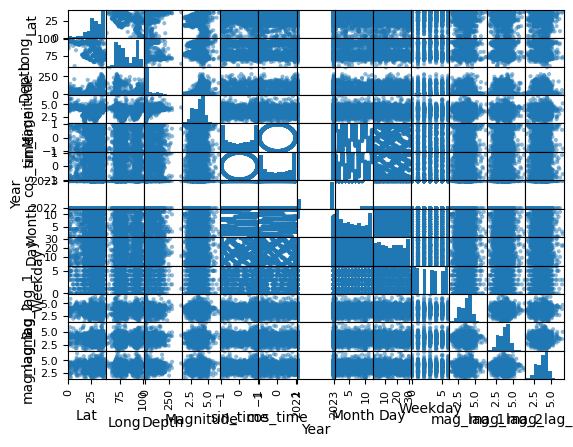

In [24]:
scatter_matrix(df)
plt.show()

## **Model Building**

In [25]:
df

,Lat,Long,Depth,Magnitude,sin_time,cos_time,Year,Month,Day,Weekday,mag_lag_1,mag_lag_2,mag_lag_3
Timestamp,,,,,,,,,,,,,
2022-09-10 20:14:02,29.81,80.40,11.0,2.6,0.051620,0.998667,2022,9,10,5,2.8,4.5,4.5
2022-09-11 01:05:13,36.35,71.82,140.0,3.9,0.068802,0.997630,2022,9,11,6,2.6,2.8,4.5
2022-09-11 01:14:21,33.62,71.54,71.0,3.8,0.085965,0.996298,2022,9,11,6,3.9,2.6,2.8
2022-09-11 18:20:20,0.68,98.45,10.0,4.5,0.103102,0.994671,2022,9,11,6,3.8,3.9,2.6
2022-09-11 23:06:21,32.87,75.51,10.0,2.5,0.120208,0.992749,2022,9,11,6,4.5,3.8,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-08 18:53:36,36.62,71.42,10.0,3.8,0.321270,0.946988,2023,9,8,4,2.9,4.2,4.4
2023-09-09 01:03:38,30.41,94.86,10.0,4.3,0.337523,0.941317,2023,9,9,5,3.8,2.9,4.2
2023-09-09 04:20:15,26.11,90.97,24.0,3.2,0.353676,0.935368,2023,9,9,5,4.3,3.8,2.9


In [32]:
train = df.loc[df.index < '2023-07-09']
test = df.loc[df.index >= '2023-07-09']

In [35]:
feats = df.columns.drop('Magnitude')
feats.tolist()

['Lat',
 'Long',
 'Depth',
 'sin_time',
 'cos_time',
 'Year',
 'Month',
 'Day',
 'Weekday',
 'mag_lag_1',
 'mag_lag_2',
 'mag_lag_3']

In [36]:
# feats = ['Lat', 'Long', 'Depth', 'Year', 'Month', 'Day', 'Weekday', 'mag_lag_1', 'mag_lag_2', 'mag_lag_3']
tars = ['Magnitude']

In [37]:
train

,Lat,Long,Depth,Magnitude,sin_time,cos_time,Year,Month,Day,Weekday,mag_lag_1,mag_lag_2,mag_lag_3
Timestamp,,,,,,,,,,,,,
2022-09-10 20:14:02,29.81,80.40,11.0,2.6,0.051620,0.998667,2022,9,10,5,2.8,4.5,4.5
2022-09-11 01:05:13,36.35,71.82,140.0,3.9,0.068802,0.997630,2022,9,11,6,2.6,2.8,4.5
2022-09-11 01:14:21,33.62,71.54,71.0,3.8,0.085965,0.996298,2022,9,11,6,3.9,2.6,2.8
2022-09-11 18:20:20,0.68,98.45,10.0,4.5,0.103102,0.994671,2022,9,11,6,3.8,3.9,2.6
2022-09-11 23:06:21,32.87,75.51,10.0,2.5,0.120208,0.992749,2022,9,11,6,4.5,3.8,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-07 05:11:28,31.22,70.21,170.0,4.3,0.693281,-0.720667,2023,7,7,4,2.9,3.7,4.0
2023-07-07 10:50:54,31.43,78.38,5.0,3.6,0.680773,-0.732494,2023,7,7,4,4.3,2.9,3.7
2023-07-08 00:14:10,24.90,94.35,70.0,3.3,0.668064,-0.744104,2023,7,8,5,3.6,4.3,2.9


In [38]:
X_train = train[feats]
y_train = np.array(train[tars])
X_test = test[feats]
y_test = np.array(test[tars])

In [43]:
X_train

,Lat,Long,Depth,sin_time,cos_time,Year,Month,Day,Weekday,mag_lag_1,mag_lag_2,mag_lag_3
Timestamp,,,,,,,,,,,,
2022-09-10 20:14:02,29.81,80.40,11.0,0.051620,0.998667,2022,9,10,5,2.8,4.5,4.5
2022-09-11 01:05:13,36.35,71.82,140.0,0.068802,0.997630,2022,9,11,6,2.6,2.8,4.5
2022-09-11 01:14:21,33.62,71.54,71.0,0.085965,0.996298,2022,9,11,6,3.9,2.6,2.8
2022-09-11 18:20:20,0.68,98.45,10.0,0.103102,0.994671,2022,9,11,6,3.8,3.9,2.6
2022-09-11 23:06:21,32.87,75.51,10.0,0.120208,0.992749,2022,9,11,6,4.5,3.8,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-07 05:11:28,31.22,70.21,170.0,0.693281,-0.720667,2023,7,7,4,2.9,3.7,4.0
2023-07-07 10:50:54,31.43,78.38,5.0,0.680773,-0.732494,2023,7,7,4,4.3,2.9,3.7
2023-07-08 00:14:10,24.90,94.35,70.0,0.668064,-0.744104,2023,7,8,5,3.6,4.3,2.9


In [105]:
# With Scaling NEcessary
def pips(models, scales=None):

  pipline = Pipeline(steps=[('scaler', scales),
                             ('model', models)])

  pipline.fit(selected_features, y_train)

  predictions = pipline.predict(test_feats_select)

  acc = mean_absolute_error(predictions, y_test)
  return acc

In [114]:
# Without Scaling Necessary
def pips(models, scales=None):

    # if scales is None:
    #     scales = None # Create a dummy scaler object

    pipline = Pipeline(steps=[('scaler', scales),
                             ('model', models)])

    pipline.fit(selected_features, y_train)

    predictions = pipline.predict(test_feats_select)

    acc = mean_absolute_error(predictions, y_test)
    return acc


In [120]:
print("LINREG: ", pips(LinearRegression()), "\nSGD:", pips(SGDRegressor()))

LINREG:  0.17709697330428384 
SGD: 0.2423796610152688


In [106]:
print("LINREG: ", pips(LinearRegression(), StandardScaler()),
      "\nDECSTR: ", pips(DecisionTreeRegressor(), StandardScaler()),
      "\nSGD: ", pips(SGDRegressor(), StandardScaler()),
      "\nRANDFORE: ", pips(RandomForestRegressor(), StandardScaler()),
      "\nGRADBOOST: ", pips(GradientBoostingRegressor(), StandardScaler()),
      "\nADABOOST: ", pips(AdaBoostRegressor(), StandardScaler()))

LINREG:  0.17709697330428426 
DECSTR:  0.13157894736842105 
SGD:  0.218424991653887 
RANDFORE:  0.12289473684210526 
GRADBOOST:  0.11518551862864823 
ADABOOST:  0.08633096466905127


In [107]:
print("LINREG: ", pips(LinearRegression(), MinMaxScaler()),
      "\nDECSTR: ", pips(DecisionTreeRegressor(), MinMaxScaler()),
      "\nSGD: ", pips(SGDRegressor(), MinMaxScaler()),
      "\nRANDFORE: ", pips(RandomForestRegressor(), MinMaxScaler()),
      "\nGRADBOOST: ", pips(GradientBoostingRegressor(), MinMaxScaler()),
      "\nADABOOST: ", pips(AdaBoostRegressor(), MinMaxScaler()))

LINREG:  0.17709697330428384 
DECSTR:  0.10526315789473684 
SGD:  0.24241957815440066 
RANDFORE:  0.12105263157894741 
GRADBOOST:  0.11334575908212426 
ADABOOST:  0.09945737461756816


---

## **Feature Selection**

Apply feature selection techniques to identify the most relevant and informative features, reducing dimensionality and improving model performance.

In [102]:
sca = MinMaxScaler(feature_range=(0, 1))
X_train = sca.fit_transform(X_train)
X_test = sca.fit_transform(X_test)

In [82]:
X_train

array([[0.19444444, 0.        , 0.42372881, ..., 0.68606513, 0.65983224,
        0.26373143],
       [0.16666667, 0.41666667, 0.06779661, ..., 0.08844359, 0.69021526,
        0.44002766],
       [0.02777778, 0.375     , 0.06779661, ..., 0.38484433, 0.94832939,
        0.12034492],
       ...,
       [0.86111111, 0.33333333, 0.86440678, ..., 0.26554907, 0.85221973,
        0.30607852],
       [0.72222222, 0.45833333, 0.69491525, ..., 0.0343435 , 0.76869812,
        0.36774377],
       [0.58333333, 0.29166667, 0.72881356, ..., 0.17832674, 0.0714864 ,
        0.22808053]])

In [83]:
y_train

array([1., 0., 0., 1., 2., 2., 1., 0., 1., 0., 0., 1., 0., 2., 0., 1., 1.,
       1., 1., 2., 2., 1., 0., 2., 2., 2., 2., 1., 1., 2., 2., 2., 1., 0.,
       0., 2., 2., 1., 1., 2., 2., 0., 0., 1., 0., 1., 2., 0., 0., 2., 1.,
       2., 1., 0., 0., 0., 0., 2., 0., 1., 1., 1., 2., 0., 1., 1., 0., 1.,
       2., 1., 2., 0., 1., 2., 2., 1., 2., 0., 1., 0., 0., 2., 1., 2., 0.,
       0., 0., 0., 0., 1., 2., 2., 2., 0., 2., 0., 2., 0., 1., 1., 1., 1.,
       0., 2., 2., 0., 1., 1., 0., 2., 2., 2.])

In [103]:
X_test

array([[0.19230769, 0.71428571, 0.04166667, 0.04166667, 0.70898819,
        0.54916421, 0.24532424, 0.28120309, 0.16962672, 0.93818271,
        0.58780247, 0.28182225, 0.4623512 , 0.95020902, 0.14432139,
        0.56663045, 0.51116228, 0.63031705, 0.        , 0.86512924,
        0.93914343, 0.60112171, 0.69522526, 0.93459479],
       [0.07692308, 0.42857143, 0.02083333, 0.        , 0.972851  ,
        0.98395554, 0.93137279, 0.30932074, 0.        , 0.95914699,
        0.4182101 , 0.96379007, 0.97200956, 0.85146293, 0.28854114,
        0.34949981, 0.86385921, 0.31592963, 0.16012726, 0.51864913,
        0.9432922 , 0.75065481, 0.56480922, 0.08732966],
       [0.26923077, 0.92857143, 0.04166667, 0.04166667, 0.05481754,
        0.61305809, 0.23865073, 0.33131688, 0.27896961, 0.35490384,
        0.73602907, 0.15679593, 0.56842424, 0.45662155, 0.66593371,
        0.94511793, 0.74273653, 0.20707316, 0.01382812, 0.19500828,
        0.59272812, 0.01427495, 0.48888674, 0.60028027],
       [0.192

In [94]:
df2 = pd.DataFrame()

In [104]:
from sklearn.feature_selection import SelectKBest, chi2

# Apply feature selection techniques to identify the most relevant features
selector = SelectKBest(chi2, k=10)
selected_features = selector.fit_transform(X_train, y_train)
test_feats_select = selector.fit_transform(X_test, y_test)

# Keep only the selected features for modeling
# data_selected = df2[df.columns[selected_features.support_]]

In [101]:
# selected_features.shape
X_train.shape

# scores = -np.log10(selected_features.pvalues_)
# scores /= scores.max()

(112, 24)

-----

## Example IMplmentation of Feature Selection

In [76]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# The iris dataset
X, y = load_iris(return_X_y=True)

y.astype('float')

# Some noisy data not correlated
E = np.random.RandomState(42).uniform(0, 0.1, size=(X.shape[0], 20))

# Add the noisy data to the informative features
X = np.hstack((X, E))

# Split dataset to select feature and evaluate the classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

y_train = y_train.astype('float')

In [91]:
E

array([[0.03745401, 0.09507143, 0.07319939, ..., 0.05247564, 0.0431945 ,
        0.02912291],
       [0.06118529, 0.01394939, 0.02921446, ..., 0.00976721, 0.0684233 ,
        0.04401525],
       [0.01220382, 0.04951769, 0.00343885, ..., 0.01959829, 0.00452273,
        0.03253303],
       ...,
       [0.02653261, 0.06015539, 0.02965599, ..., 0.08616909, 0.02740716,
        0.08070709],
       [0.01952406, 0.0345342 , 0.03356105, ..., 0.0011418 , 0.07036998,
        0.09702571],
       [0.04376613, 0.02349734, 0.0704871 , ..., 0.03097879, 0.02900455,
        0.0871414 ]])

In [78]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=4)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

In [80]:
scores

array([3.72189526e-01, 1.92112431e-01, 9.98924450e-01, 1.00000000e+00,
       1.61525527e-02, 1.78421693e-03, 3.36072503e-02, 9.34126229e-04,
       8.38039241e-03, 4.46122522e-03, 2.47289009e-03, 3.04121968e-03,
       4.16671859e-03, 6.37306186e-03, 2.79418271e-03, 5.46727836e-03,
       9.36025883e-04, 8.67509750e-03, 2.39127975e-03, 6.33147019e-04,
       1.10538184e-03, 7.61511411e-03, 1.15995689e-03, 2.40400211e-02])

---